In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

## 1. Линейная регрессия. Реализация

In [2]:
data = load_boston()
data['data'].shape

(506, 13)

In [3]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 1.1. Реализация линейной регрессии с использованием матричных операций

Линейная регрессия выражается следующей зависимостью:
$$y=X\theta+\epsilon,$$
где $X$ — матрица объекты-признаки, $y$ — вектор целевых значений, соответствующих $X$, $\theta$ — параметр линейной регрессии, $\epsilon$ — некоторый шум.

Из данного следует выражение для $\theta$ как:
$$X^Ty=X^TX\theta \rightarrow \theta=(X^TX)^{-1}X^Ty$$

Реализуем выражение для $\theta$ с помощью операций линейной алгебры библиотеки Numpy:

In [4]:
# ЗАДАЧА Реализовать функцию, осуществляющую матричные операции для получения theta
def linreg_linear(X, y):
    Xt = np.transpose(X)
    XtX = np.dot(Xt,X)
    Xty = np.dot(Xt,y)
    theta = np.linalg.solve(XtX,Xty)    
    return theta

In [5]:
# Подготовить данные
X, y = data['data'], data['target']

In [6]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [7]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
X.shape

(506, 13)

In [9]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [10]:
y.shape

(506,)

In [11]:
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [12]:
X.shape

(506, 14)

In [13]:
X.shape[0]

506

In [14]:
X

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0000e+00, 1.0959e-01, 0.0000e+00, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [15]:
# Вычислить параметр theta
theta = linreg_linear(X, y)

In [16]:
theta.shape

(14,)

In [17]:
# Сделать предсказания для всей выборки
y_pred = X.dot(theta)

In [18]:
def print_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f'MAE = {mae:.2f}, MSE = {mse:.2f}, RMSE = {rmse:.2f}')

In [19]:
# Посчитать значение ошибок MSE и RMSE для всех данных
print_regression_metrics(y, y_pred)

MAE = 3.27, MSE = 21.89, RMSE = 4.68


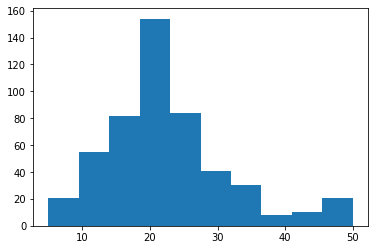

In [20]:
plt.hist(y);

In [21]:
# Разбить выборку на train/valid, вычислить theta,
# сделать предсказания и посчитать ошибки MSE и RMSE

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
theta = linreg_linear(X_train, y_train)
y_pred = X_valid.dot(theta)
y_train_pred = X_train.dot(theta)

In [22]:
print_regression_metrics(y_valid, y_pred)
print_regression_metrics(y_train, y_train_pred)

MAE = 3.19, MSE = 17.14, RMSE = 4.14
MAE = 3.38, MSE = 23.31, RMSE = 4.83


In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
print_regression_metrics(y, y_pred)

MAE = 3.27, MSE = 21.89, RMSE = 4.68


In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_valid)
print_regression_metrics(y_valid, y_pred)

MAE = 3.19, MSE = 17.14, RMSE = 4.14


### 1.2. Реализация линейной регрессии с использованием методов оптимизации

Для реализации линейной регрессии с помощью методов оптимизации будем использовать функцию ошибки **среднего квадратичного** ([Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)), которая является выпуклой функцией в n-мерном пространстве $\mathbb{R}^n$ и в общем виде выглядит следующим образом:
$$MSE = \frac{1}{n} * \sum_{i=1}^{n}{(y_i - a(x_i))^2}.$$
Здесь $x_i$ — вектор-признак $i$-го объекта обучающей выборки, $y_i$ — истинное значение для $i$-го объекта, $a(x)$ — алгоритм, предсказывающий для данного объекта $x$ целевое значение, $n$ — кол-во объектов в выборке.

В случае линейной регрессии $MSE$ представляется как:
$$MSE(X, y, \theta) = \frac{1}{2n} * \sum_{i=1}^{n}{(y_i - \theta^Tx_i)^2} = \frac{1}{2n} \lVert{y - X\theta}\rVert_{2}^{2}=\frac{1}{2n} (y - X\theta)^T(y - X\theta),$$
где $\theta$ — параметр модели линейной регрессии, $X$ — матрица объекты-признаки, $y$ - вектор истинных значений, соответствующих $X$.

Возьмем первый вариант представления функции ошибки и посчитаем ее градиент по параметру $\theta$, предварительно переименовав $MSE$ в $L$:
$$L=\frac{1}{2n} * \sum_{i=1}^{n}{(y_i - \theta^Tx_i)^2}$$
$$\nabla L = \frac{1}{n}\sum_{i=1}^{n}{(\theta^Tx_i - y_i) \cdot x_i} = \frac{1}{n}X^T(X\theta - y)$$

Исходя из полученного выражения градиента, реализуем алгоритм градиентного спуска:

In [25]:
# Реализовать функцию вычисления градиента функции MSE

def calc_mse_gradient(X, y, theta):
    n = X.shape[0]
    grad = 1. / n * X.transpose().dot(X.dot(theta) - y)
    
    return grad

In [26]:
# Реализовать функцию, осуществляющую градиентный шаг
# (функция должна содержать параметр величины шага alpha - learning rate)

def gradient_step(theta, theta_grad, alpha):
    return theta - alpha * theta_grad

In [27]:
# Реализовать функцию цикла градиентного спуска с доп. параметрами
# начального вектора theta и числа итераций

def optimize(X, y, grad_func, start_theta, alpha, n_iters):
    theta = start_theta.copy()
    
    for i in range(n_iters):
        theta_grad = grad_func(X, y, theta)
        theta = gradient_step(theta, theta_grad, alpha)
    
    return theta


In [28]:
# Разбить таблицу данных на матрицы X и y
X, y = data['data'], data['target']

# Добавить фиктивный столбец единиц (bias линейной модели)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
m = X.shape[1]

In [29]:
# Оптимизировать параметр линейной регрессии theta на всех данных
theta = optimize(X, y, calc_mse_gradient, np.ones(m), 0.001, 100)

In [30]:
theta

array([7.41647399e+246, 3.32349992e+247, 7.39564172e+247, 8.96295209e+247,
       5.07578059e+245, 4.22030567e+246, 4.63094053e+247, 5.29083888e+248,
       2.65643383e+247, 8.19991211e+247, 3.27135991e+249, 1.38363846e+248,
       2.64323053e+249, 9.88835598e+247])

In [31]:
# Проверить максимальные значения по каждому признаку в данных
X.max(axis=0)

array([  1.    ,  88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,
         8.78  , 100.    ,  12.1265,  24.    , 711.    ,  22.    ,
       396.9   ,  37.97  ])

### Задание 3.6.3

In [32]:
X.std(axis=0)

array([0.00000000e+00, 8.59304135e+00, 2.32993957e+01, 6.85357058e+00,
       2.53742935e-01, 1.15763115e-01, 7.01922514e-01, 2.81210326e+01,
       2.10362836e+00, 8.69865112e+00, 1.68370495e+02, 2.16280519e+00,
       9.12046075e+01, 7.13400164e+00])

In [35]:
print(data['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [36]:
np.argmax(X.std(axis=0))

10

In [37]:
print(data['feature_names'][np.argmax(X.std(axis=0)) - 1])
print(np.max(X.std(axis=0)))

TAX
168.3704950393814


### Задание 3.6.4

In [38]:
# Разбить таблицу данных на матрицы X и y
X, y = data['data'], data['target']

# Фиктивный столбец единиц (bias линейной модели) НЕ добавляем

m = X.shape[1]
m

13

In [39]:
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
print_regression_metrics(y, y_pred)

MAE = 3.27, MSE = 21.89, RMSE = 4.68


### Задание 3.6.5

In [40]:
# Разбить таблицу данных на матрицы X и y
X, y = data['data'], data['target']

for i in range(X.shape[0] - 1):
    str_num = X.shape[0]
    print(str_num)
    for i in range(str_num - 1):
        if X[i, 11] < 50:
            X = np.delete(X, (i), axis=0) 
            y = np.delete(y, i)
            break

506
505
504
503
502
501
500
499
498
497
496
495
494
493
492
491
490
489
488
487
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486
486


In [51]:
X.shape, y.shape

((486, 13), (486,))

In [52]:
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
print_regression_metrics(y, y_pred)

MAE = 3.28, MSE = 21.79, RMSE = 4.67


In [54]:
# Нормализовать даннные с помощью стандартной нормализации
X, y = data['data'], data['target']
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [55]:
# Добавить фиктивный столбец единиц (bias линейной модели)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
X.max(axis=0)

array([1.        , 9.9339306 , 3.80423444, 2.42256516, 3.66839786,
       2.73234648, 3.55504427, 1.11749449, 3.96051769, 1.66124525,
       1.79819419, 1.63882832, 0.44105193, 3.54877081])

In [56]:
m = X.shape[1]
m

14

In [57]:
# Оптимизировать theta на новых данных
theta = optimize(X, y, calc_mse_gradient, np.ones(m), 0.01, 5000)

In [58]:
theta

array([ 2.25328063e+01, -9.21740195e-01,  1.07033639e+00,  1.06388396e-01,
        6.86667316e-01, -2.05006416e+00,  2.68062168e+00,  1.40667969e-02,
       -3.10608483e+00,  2.57511475e+00, -1.97802851e+00, -2.05725099e+00,
        8.48690321e-01, -3.74025884e+00])

In [59]:
# Сделать предсказания при полученных параметрах
y_pred = X.dot(theta)

In [60]:
# Посчитать значение ошибок MSE и RMSE для всех данных
print_regression_metrics(y, y_pred)

MAE = 3.27, MSE = 21.90, RMSE = 4.68


In [61]:
# Разбить выборку на train/valid, оптимизировать theta,
# сделать предсказания и посчитать ошибки MSE и RMSE

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
theta = optimize(X_train, y_train, calc_mse_gradient, np.ones(m), 0.01, 5000)
y_pred = X_valid.dot(theta)

print_regression_metrics(y_valid, y_pred)

MAE = 3.85, MSE = 32.92, RMSE = 5.74


### Задание 3.6.6

In [72]:
X, y = data['data'], data['target']
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [73]:
# Добавить фиктивный столбец единиц (bias линейной модели)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
X.max(axis=0), X.std(axis=0).max()

(array([1.        , 9.9339306 , 3.80423444, 2.42256516, 3.66839786,
        2.73234648, 3.55504427, 1.11749449, 3.96051769, 1.66124525,
        1.79819419, 1.63882832, 0.44105193, 3.54877081]),
 1.0000000000000069)

In [74]:
theta = linreg_linear(X, y)
theta

array([ 2.25328063e+01, -9.28146064e-01,  1.08156863e+00,  1.40899997e-01,
        6.81739725e-01, -2.05671827e+00,  2.67423017e+00,  1.94660717e-02,
       -3.10404426e+00,  2.66221764e+00, -2.07678168e+00, -2.06060666e+00,
        8.49268418e-01, -3.74362713e+00])

In [75]:
y_pred = X.dot(theta)

In [76]:
print_regression_metrics(y, y_pred)

MAE = 3.27, MSE = 21.89, RMSE = 4.68


### Эксперименты со стандартизацией

#### 1. Без стандартизации

In [78]:
X, y = data['data'], data['target']
#X = (X - X.mean(axis=0)) / X.std(axis=0)

In [79]:
# Добавить фиктивный столбец единиц (bias линейной модели)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
X.max(axis=0), X.std(axis=0).max()

(array([  1.    ,  88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,
          8.78  , 100.    ,  12.1265,  24.    , 711.    ,  22.    ,
        396.9   ,  37.97  ]),
 168.3704950393814)

#### 1.a Матричные вычисления

In [80]:
theta = linreg_linear(X, y)
theta

array([ 3.64594884e+01, -1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
        2.68673382e+00, -1.77666112e+01,  3.80986521e+00,  6.92224640e-04,
       -1.47556685e+00,  3.06049479e-01, -1.23345939e-02, -9.52747232e-01,
        9.31168327e-03, -5.24758378e-01])

In [81]:
y_pred = X.dot(theta)

In [82]:
print_regression_metrics(y, y_pred)

MAE = 3.27, MSE = 21.89, RMSE = 4.68


#### 1.b Градиентный спуск

In [87]:
m = X.shape[1]
theta = optimize(X, y, calc_mse_gradient, np.ones(m), 0.001, 100)
#theta = optimize(X, y, calc_mse_gradient, np.ones(m), 0.01, 5000)
theta

array([7.41647399e+246, 3.32349992e+247, 7.39564172e+247, 8.96295209e+247,
       5.07578059e+245, 4.22030567e+246, 4.63094053e+247, 5.29083888e+248,
       2.65643383e+247, 8.19991211e+247, 3.27135991e+249, 1.38363846e+248,
       2.64323053e+249, 9.88835598e+247])

In [88]:
y_pred = X.dot(theta)

In [89]:
print_regression_metrics(y, y_pred)

MAE = 2321492361380077350258965809988226930897277888518980660416046042298544196322429443176884566393566527785034326353331067289590184691791718153750788055576087069184972402484848044526396320756835960061698864503994037425531783060945306707168263434844778790912.00, MSE = inf, RMSE = inf


C:\tools\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:254: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


#### 2. Применим стандартизацию

In [90]:
X, y = data['data'], data['target']
X = (X - X.mean(axis=0)) / X.std(axis=0) # Стандартизируем только X и ДОБАВИМ фиктивный столбец

In [91]:
# Добавить фиктивный столбец единиц (bias линейной модели)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
X.max(axis=0), X.std(axis=0).max()

(array([1.        , 9.9339306 , 3.80423444, 2.42256516, 3.66839786,
        2.73234648, 3.55504427, 1.11749449, 3.96051769, 1.66124525,
        1.79819419, 1.63882832, 0.44105193, 3.54877081]),
 1.0000000000000069)

#### 2.a Матричные вычисления

In [92]:
theta = linreg_linear(X, y)
theta

array([ 2.25328063e+01, -9.28146064e-01,  1.08156863e+00,  1.40899997e-01,
        6.81739725e-01, -2.05671827e+00,  2.67423017e+00,  1.94660717e-02,
       -3.10404426e+00,  2.66221764e+00, -2.07678168e+00, -2.06060666e+00,
        8.49268418e-01, -3.74362713e+00])

In [93]:
y_pred = X.dot(theta)

In [94]:
print_regression_metrics(y, y_pred)

MAE = 3.27, MSE = 21.89, RMSE = 4.68


#### 2.b Градиентный спуск

In [95]:
m = X.shape[1]
#theta = optimize(X, y, calc_mse_gradient, np.ones(m), 0.001, 100)
theta = optimize(X, y, calc_mse_gradient, np.ones(m), 0.01, 5000)
theta

array([ 2.25328063e+01, -9.21740195e-01,  1.07033639e+00,  1.06388396e-01,
        6.86667316e-01, -2.05006416e+00,  2.68062168e+00,  1.40667969e-02,
       -3.10608483e+00,  2.57511475e+00, -1.97802851e+00, -2.05725099e+00,
        8.48690321e-01, -3.74025884e+00])

In [96]:
y_pred = X.dot(theta)

In [97]:
print_regression_metrics(y, y_pred)

MAE = 3.27, MSE = 21.90, RMSE = 4.68


#### 3. Применим стандартизацию также по y

In [104]:
X, y = data['data'], data['target']
X = X - X.mean(axis=0)
X = X / X.std(axis=0)

y_m = y.mean() # Сохраним для восстановления
y = y - y_m  # Стандартизируем также по y и НЕ ДОБАВЛЯЕМ фиктивный столбец
y_s = y.std() # Сохраним для восстановления
y = y / y_s

In [105]:
# НЕ ДОБАВЛЯЕМ фиктивный столбец единиц (bias линейной модели)
#X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
X.max(axis=0), X.std(axis=0).max()

(array([9.9339306 , 3.80423444, 2.42256516, 3.66839786, 2.73234648,
        3.55504427, 1.11749449, 3.96051769, 1.66124525, 1.79819419,
        1.63882832, 0.44105193, 3.54877081]),
 1.000000000000007)

In [106]:
y.max(), y.std()

(2.989460074199074, 0.9999999999999999)

#### 3.a Матричные вычисления

In [107]:
theta = linreg_linear(X, y)
theta

array([-0.10101708,  0.1177152 ,  0.0153352 ,  0.07419883, -0.22384803,
        0.29105647,  0.00211864, -0.33783635,  0.28974905, -0.22603168,
       -0.22427123,  0.09243223, -0.40744693])

In [109]:
y_pred = X.dot(theta)

In [110]:
y = data['target']
y_pred = y_pred*y_s + y_m

In [111]:
print_regression_metrics(y, y_pred)

MAE = 3.27, MSE = 21.89, RMSE = 4.68


#### 3.b Градиентный спуск

In [113]:
X, y = data['data'], data['target']
X = X - X.mean(axis=0)
X = X / X.std(axis=0)

y_m = y.mean() # Сохраним для восстановления
y = y - y_m  # Стандартизируем также по y и НЕ ДОБАВЛЯЕМ фиктивный столбец
y_s = y.std() # Сохраним для восстановления
y = y / y_s

In [114]:
m = X.shape[1]
#theta = optimize(X, y, calc_mse_gradient, np.ones(m), 0.001, 100)
theta = optimize(X, y, calc_mse_gradient, np.ones(m), 0.01, 5000)
theta

array([-0.10044685,  0.1167251 ,  0.01239763,  0.0746165 , -0.22312206,
        0.29163353,  0.00164003, -0.33788201,  0.28231146, -0.21766618,
       -0.22395412,  0.09239155, -0.40715989])

In [115]:
y_pred = X.dot(theta)

In [116]:
y = data['target']
y_pred = y_pred*y_s + y_m

In [117]:
print_regression_metrics(y, y_pred)

MAE = 3.27, MSE = 21.90, RMSE = 4.68
